In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv("C:/Users/simon/OneDrive/Documents/CUA COURSES/ENGR 441 & 442/Prototype 2/MASTER DATAFRAME/MASTER_system_and_weather.csv")

In [7]:
df.head()

,Date,Generated (kWh),Efficiency,System Name,Location,System Size (kW),Solar_Irradiance,Temperature_2m,Cloud_Cover
0,9/22/2023,180.330,3.60660,Wray Farms,United Kingdom,50.0,13.88,12.6,49
1,9/23/2023,140.380,2.80760,Wray Farms,United Kingdom,50.0,12.45,12.9,41
2,9/24/2023,86.931,1.73862,Wray Farms,United Kingdom,50.0,7.79,16.9,97
3,9/25/2023,171.482,3.42964,Wray Farms,United Kingdom,50.0,13.06,17.4,59
4,9/26/2023,123.231,2.46462,Wray Farms,United Kingdom,50.0,9.27,16.1,74


In [9]:
df['Efficiency'] = pd.to_numeric(df['Efficiency'], errors='coerce')
numeric_df = df.select_dtypes(include='number')
print(numeric_df.columns)

Index(['Generated (kWh)', 'Efficiency', 'System Size (kW)', 'Solar_Irradiance',
       'Temperature_2m', 'Cloud_Cover'],
      dtype='object')


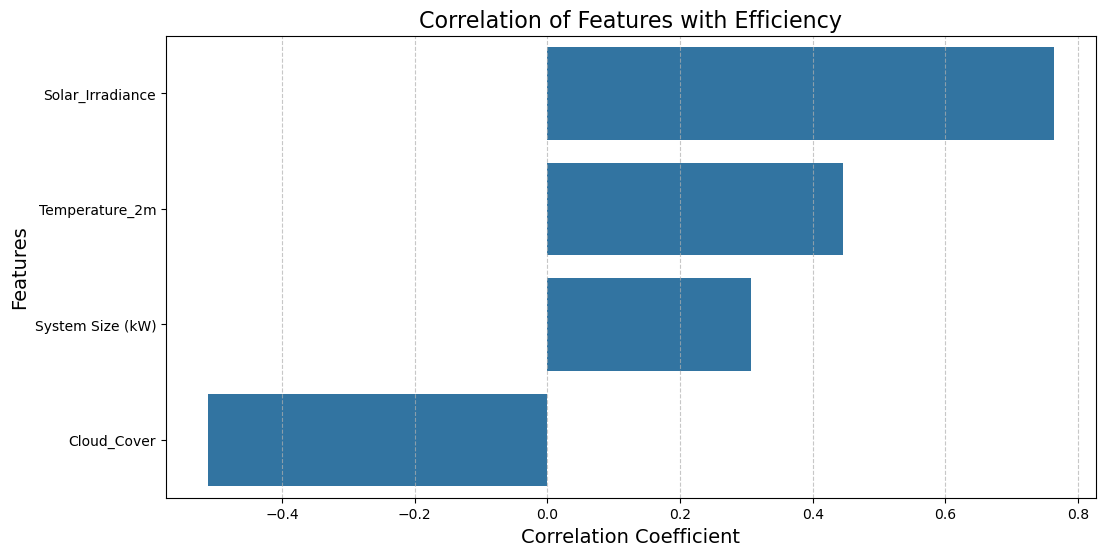

In [11]:
correlations = numeric_df.corr()['Efficiency'].sort_values(ascending=False)

correlations = correlations.drop('Efficiency')
correlations = correlations.drop('Generated (kWh)')


plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)

plt.title('Correlation of Features with Efficiency', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

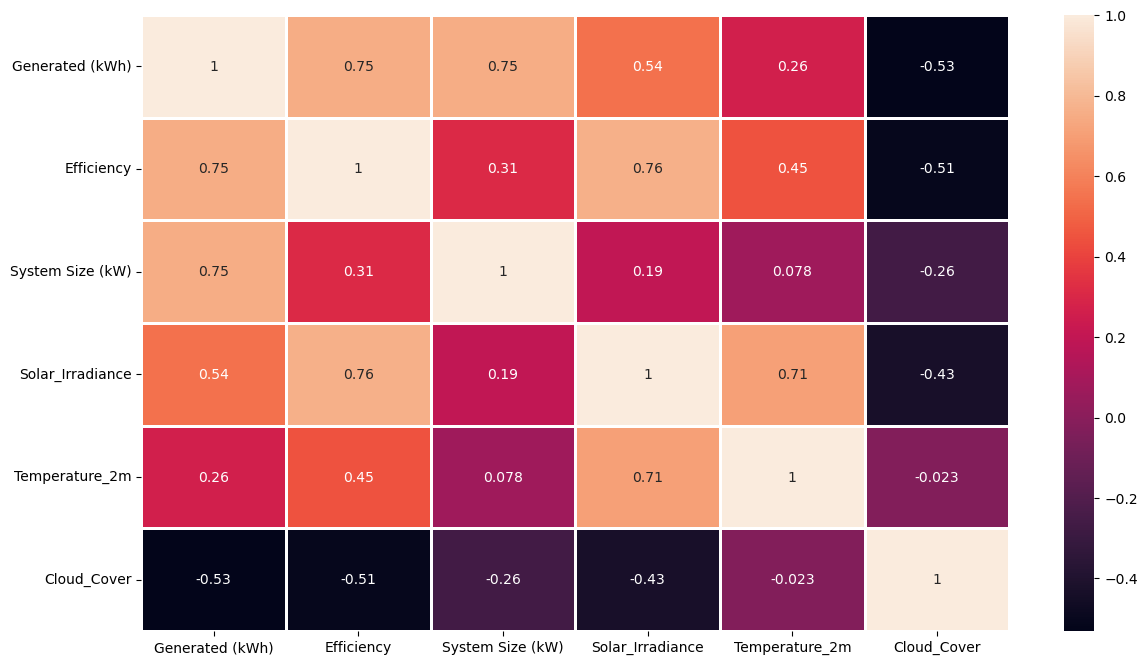

In [13]:
plt.figure(figsize=(14, 8))

sns.heatmap(numeric_df.corr(), annot=True, linewidth =1)

plt.show()

In [80]:
df.dtypes

Date                 object
Generated (kWh)     float64
Efficiency          float64
System Name          object
Location             object
System Size (kW)    float64
Solar_Irradiance    float64
Temperature_2m      float64
Cloud_Cover           int64
dtype: object

In [82]:
df.isnull().sum()

Date                0
Generated (kWh)     0
Efficiency          0
System Name         0
Location            0
System Size (kW)    0
Solar_Irradiance    0
Temperature_2m      0
Cloud_Cover         0
dtype: int64

In [84]:
df.tail(50)

,Date,Generated (kWh),Efficiency,System Name,Location,System Size (kW),Solar_Irradiance,Temperature_2m,Cloud_Cover
3912,3/24/2025,631.149,5.843972,Nugali,Brazil,108.000,20.16,25.1,63
3913,3/24/2025,602.428,1.187987,siris-D-500kW,Greece,507.100,9.54,11.1,100
3914,3/25/2025,960.670,1.927431,Schipper Power- Three,Netherlands,498.420,12.16,8.2,74
3915,3/25/2025,114.534,1.762062,Feuerwehr,Switzerland,65.000,14.33,8.9,49
3916,3/25/2025,1453.008,5.749478,Wannon Water,Australia,252.720,18.66,16.1,13
3917,3/25/2025,423.257,0.834662,siris-D-500kW,Greece,507.100,7.20,12.1,99
3918,3/25/2025,148.946,1.622505,HLT1 Klagenfurt Lastenstrasse,Austria,91.800,16.96,8.8,55
3919,3/25/2025,242.491,2.155476,DeCrescent 178kW PV,United States,112.500,24.07,27.1,57
3920,3/25/2025,592.000,1.173730,Pentaari,Greece,504.375,9.62,10.1,96
3921,3/25/2025,1939.269,4.621378,MAWC,Maldives,419.630,25.01,28.6,20


In [15]:
X = df[['System Size (kW)', 'Solar_Irradiance', 'Temperature_2m', 'Cloud_Cover']]
y = df['Generated (kWh)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.001, max_depth=3, random_state=42)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.001, random_state=42)

In [23]:
cv_scores = cross_val_score(gbr, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.14726151 0.04414394 0.13180165 0.05763561 0.12315651]


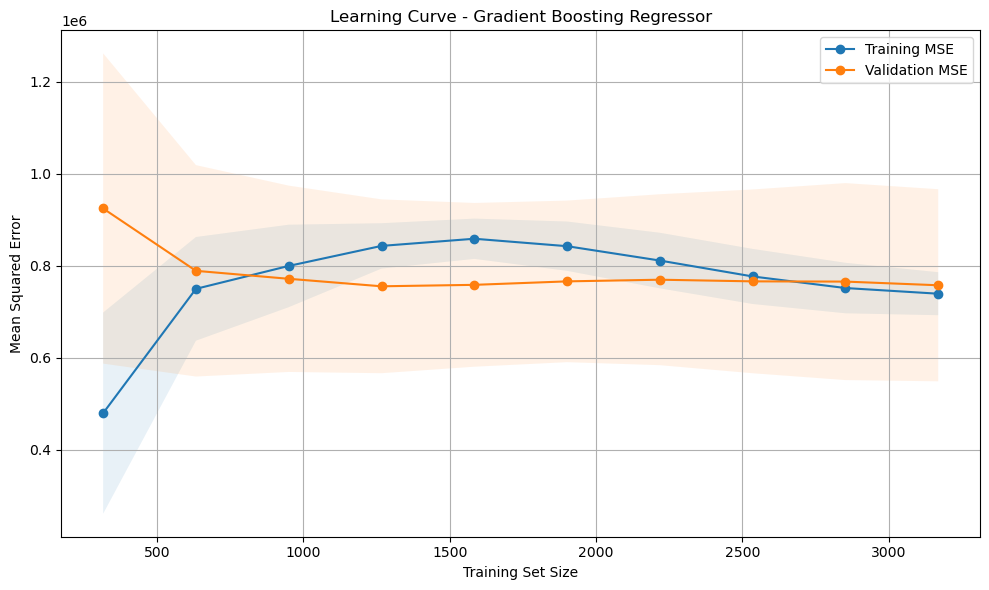

In [33]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=gbr,
    X=X,
    y=y,
    cv=5,
    scoring='neg_mean_squared_error',  
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training MSE')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation MSE')
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1)
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1)
plt.title("Learning Curve - Gradient Boosting Regressor")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

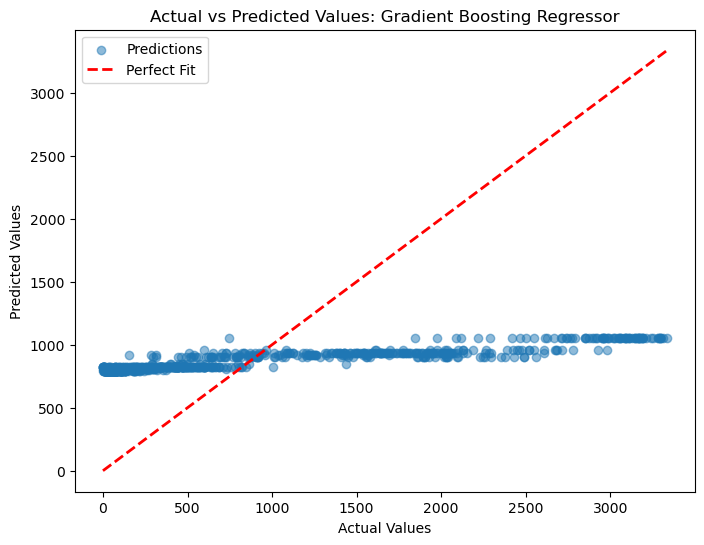

In [35]:
y_pred = gbr.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values: Gradient Boosting Regressor")
plt.legend()
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [31]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 732.1273665385638
Mean Squared Error (MSE): 793329.9983217679
R² Score: 0.14366000183124739
